In [41]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append("..")

from heritageconnector import datastore

from rdflib import Graph
from rdflib.extras.external_graph_libs import rdflib_to_networkx_graph

import matplotlib.pyplot as plt

import networkx as nx
from networkx.readwrite import json_graph

import json

import pandas as pd
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)

from IPython.display import display

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [65]:
# get data from ES
jsonld = datastore.get_by_type('person', size=100)['hits']['hits']
len(jsonld)

100

In [66]:
# combine all records into one graph
g = Graph()

for item in jsonld:
    g +=  Graph().parse(
            data=json.dumps(item["_source"]["graph"]), 
            format="json-ld"
            ) 

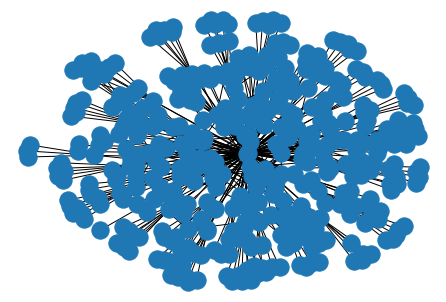

In [67]:
# convert graph to networkx
g_nx = rdflib_to_networkx_graph(g)
nx.draw(g_nx, with_labels=False)

In [70]:
# and then to json for d3
links = json_graph.node_link_data(g_nx)['links']

rdf_links = []

for item in links:
    s = item['source']
    p = item['triples'][0][1]
    o = item['target']
    
    rdf_links.append({'subject': s, 'predicate': p, 'object': o})
    
with open("triples.json", "w") as f:
    json.dump(rdf_links, f)
